# prédiction des transactions frauduleuses

Dans ce notebook, j'utilise plusieurs modèles ML pour détecter si une transaction par une carte bancaire est légitime ou fraude

Objectifs:
* explorer et visualiser la data afin de tirer l'insight
* résoudre le problème d'Imbalanced dataset
* préparation de data
* entrainement de plusieurs modèles ML
* choisir le meilleur classifier pour la prédiction

# IMPORTING DATASET

In [2]:
import os
import pandas as pd
import numpy as np 
# changer le CREDITCARD_PATH par le chemin de réportoire de dataset 
CREDITCARD_PATH = "/media/reda/E/UBUNTO_SYS/Télechargement/test_DevoTeam/D2FRecrutement/fraudulent_transaction/"
CREDITCARD_NAME = "creditcard.csv"
CREDITCARD_FILE = os.path.join(CREDITCARD_PATH, CREDITCARD_NAME)
CREDITCARD_DATA = pd.read_csv( CREDITCARD_FILE )

### comprendre la data 

In [56]:
CREDITCARD_DATA.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [59]:
print ('# nombres de colonnes: ', len(CREDITCARD_DATA.columns))
print('# nombre de lignes', len(CREDITCARD_DATA))

# nombres de colonnes:  31
# nombre de lignes 284807


# VISUALISE ALL FEATURES 

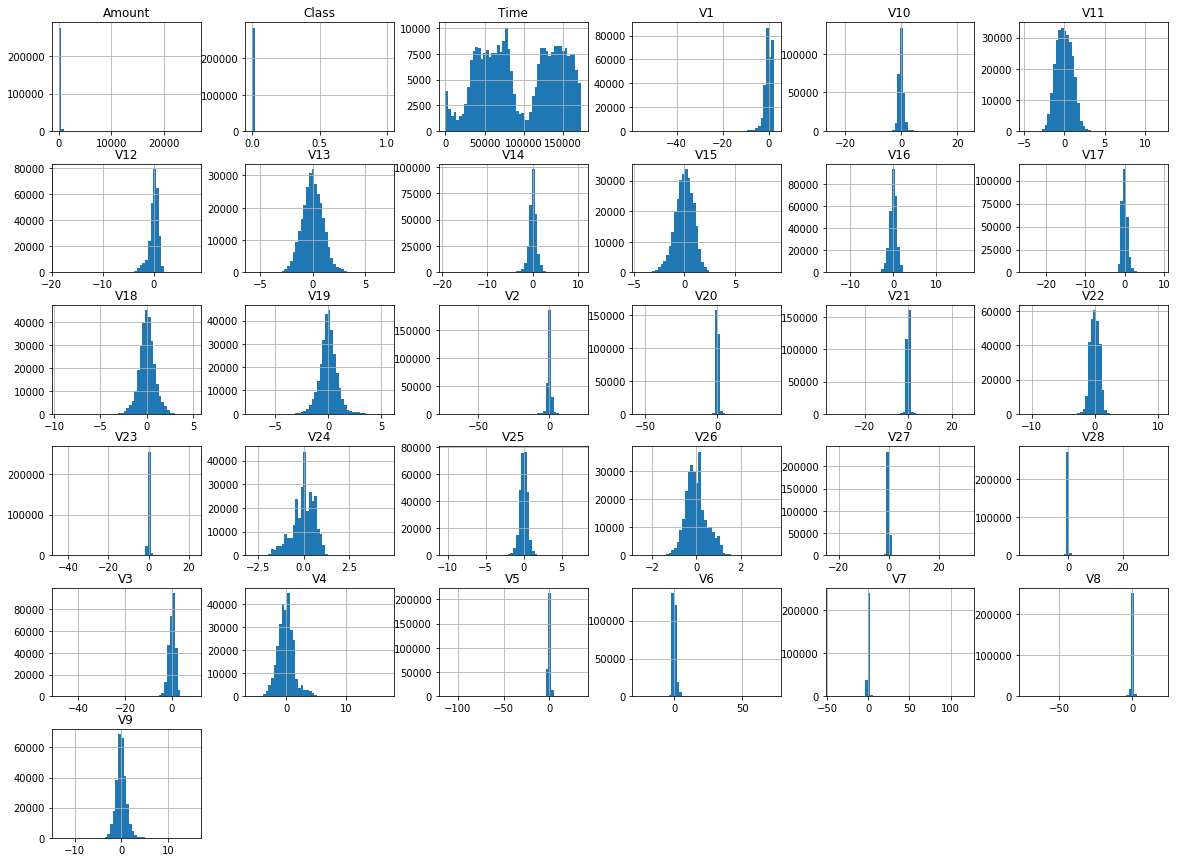

In [3]:
# seulement 3 features sont nommés ['Amount', 'Class', 'Time'] dont l'une est la classe a prédire
# et 28 anonymisés [V1-V28]
%matplotlib inline
import matplotlib.pyplot as plt
CREDITCARD_DATA.hist(bins=50, figsize=(20,15))
plt.show()

[]

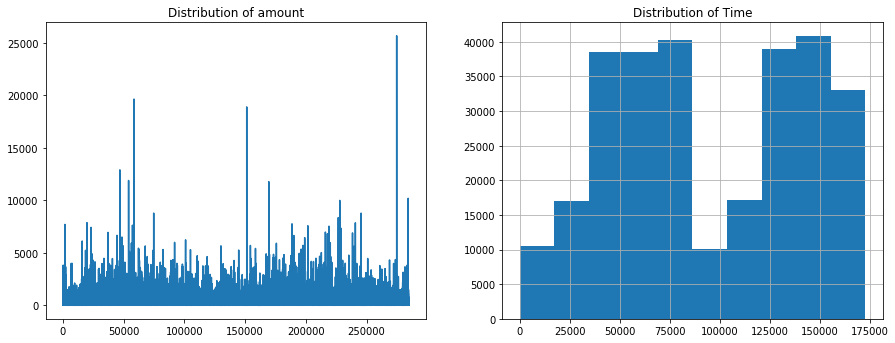

In [5]:
plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
plt.title('Distribution of amount')
CREDITCARD_DATA['Amount'].plot()
plt.subplot(2, 2, 2)
CREDITCARD_DATA['Time'].hist()
plt.title('Distribution of Time')
plt.plot()

In [6]:
print("maximum of amount:",CREDITCARD_DATA['Amount'].max())
print("minimum of amount:",CREDITCARD_DATA['Amount'].min())
print("mean of amount:",CREDITCARD_DATA['Amount'].mean())

maximum of amount: 25691.16
minimum of amount: 0.0
mean of amount: 88.34961925087359


In [60]:
# verifier si y a des valeurs manquantes 
print("les valeurs null dans la data")
for k in CREDITCARD_DATA.keys():
    missing_values = CREDITCARD_DATA[k].isnull()
    print(k + ': ',len( missing_values[missing_values == True] ))

les valeurs manquantes
Time:  0
V1:  0
V2:  0
V3:  0
V4:  0
V5:  0
V6:  0
V7:  0
V8:  0
V9:  0
V10:  0
V11:  0
V12:  0
V13:  0
V14:  0
V15:  0
V16:  0
V17:  0
V18:  0
V19:  0
V20:  0
V21:  0
V22:  0
V23:  0
V24:  0
V25:  0
V26:  0
V27:  0
V28:  0
Amount:  0
Class:  0


### ploting imbalanced dataset

La plupart des transactions sont légitimes 99%, tandis que les transactions frauduleuses sont seulement 0.17%, l'ensemble de données initial est imbalanced, La plupart des transactions sont non frauduleuses. Si on utilise cette data pour entrainer ces modèles, on pourra avoir des erreurs au niveau de la prédiction ainsi que le modèle va prédire avec une grande accuracy que la plupart des transactions sont légitimes

legitime transactions samples  284315
fraudulent transactions samples  492


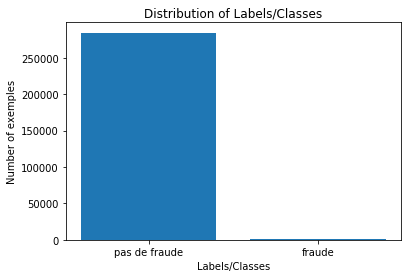

In [61]:
# visualiser la différence de distribution entre les transactions frauduleuses et légitimes
import numpy as np
print("legitime transactions samples ",len( CREDITCARD_DATA[CREDITCARD_DATA['Class'] == 0] ))
print("fraudulent transactions samples ",len( CREDITCARD_DATA[CREDITCARD_DATA['Class'] == 1] ))
no_fraude = len( CREDITCARD_DATA[CREDITCARD_DATA['Class'] == 0] )
fraude = len( CREDITCARD_DATA[CREDITCARD_DATA['Class'] == 1] )
y = np.array([no_fraude, fraude])
plt.bar(['pas de fraude','fraude'], y)
plt.xlabel('Labels/Classes')
plt.ylabel('Number of exemples')
plt.title('Distribution of Labels/Classes')
plt.show()

### Discovering Correlation 

Text(0.5, 1, 'Correlation heatmap')

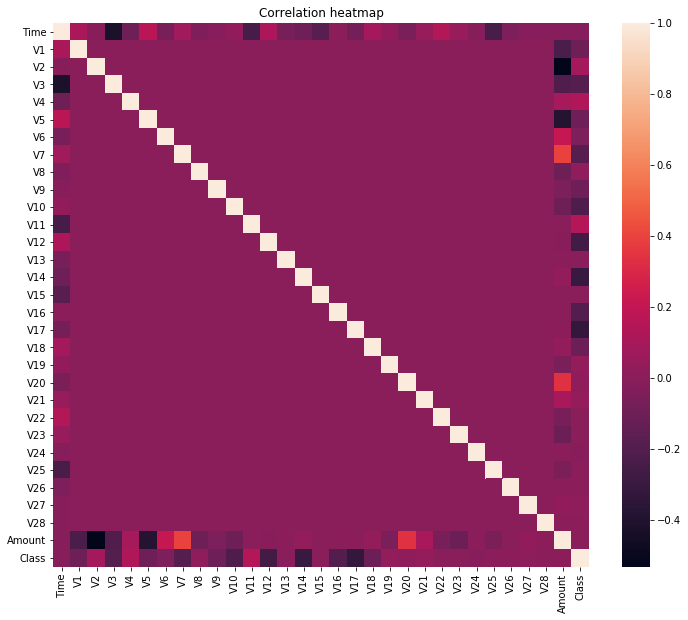

In [62]:
correlation = CREDITCARD_DATA.corr() 
# seaborn est une bibliothèque de visualisation de données en Python basée sur matplotlib
# fournit une interface  haut niveau pour dessiner des graphiques statistique
import seaborn as sns 

plt.figure(figsize=(12,10)) 
heat = sns.heatmap(data=correlation) 
plt.title('Correlation heatmap') 

Les features V1-V28 sont pas fortement corrélées entre eux selon la heatmap
Corrélations négatives : V17, V14 et V12  sont corrélés négativement
Corrélations positives : V2, V4 et V11  sont corrélées positivement

In [63]:
# les features en corrélation avec la classe de prédiction 
correlation['Class'].sort_values( ascending = True )

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

# Data preparation

dans cette section on:
* sépare les features et la classe de prédiction 
* standardize toutes les features 
* résoudre l'imbalanced set

### Separating  Features from  labels

In [74]:
# separer les échantillons létigimes et frauduleux 
legitime = CREDITCARD_DATA[CREDITCARD_DATA["Class"] == 0]
fraud = CREDITCARD_DATA[CREDITCARD_DATA["Class"] == 1]
# prendre que 50000 échantillons ligitime 
selected_legitime = legitime.sample(50000)
# concatenater les legitime et les frauduleux  
resampled_creditcard_data = np.concatenate((selected_legitime, fraud))
# randomly shuffle data 
np.random.shuffle( resampled_creditcard_data )
# separer les features et les classes labels
features, labels = resampled_creditcard_data[:,:-1], resampled_creditcard_data[:,-1]

### Scaling the data values to standardize 

In [75]:
#Feature scaling est une méthode utilisée pour normaliser et unifier l'echelle des variables.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform( features )

### split data into train and test set 

In [82]:
# faut separer la data avant l'oversampling afin de préserver la data pour la validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size = 0.2, random_state = 42)

### oversampling

pour corriger le probléme de l'imbalanced dataset on va faire appel a SMOTE(Synthetic Minority Oversampling Technique ) qui génére de nouveaux échantillons par interpolation, synthétiquement diffèrent utilisant KNN

In [77]:
# create several datasets using smote 
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape {}'.format( Counter( y_train ) ))
X_res_smote, y_res_smote = SMOTE().fit_resample( X_train, y_train )
print('SMOTE Oversampled dataset shape {}'.format( Counter( y_res_smote ) ))

Original dataset shape Counter({0.0: 40017, 1.0: 376})
SMOTE Oversampled dataset shape Counter({0.0: 40017, 1.0: 40017})


# select and train models

Dans cette section on va entrainer plusieurs modèles de ML pour sélectionner un à la fin

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))

In [79]:
# verification de la data 
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_res_smote.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_res_smote.shape, y_test.shape)

X_shapes:
 X_train: X_validation:
 (80034, 30) (10099, 30) 

Y_shapes:
 Y_train: Y_validation:
 (80034,) (10099,)


In [83]:
# ce filtre nous permet d'éviter les warinings générere dans la cellule suivante 
# import warnings filter
from warnings import simplefilter
# ignorer tous les future warnings
simplefilter(action='ignore', category=FutureWarning)

# regroupe et shuffle  data pour éviter la présence d'une seule classe dans une cv-fold 
regrouped_data = np.c_[X_res_smote, y_res_smote]
np.random.shuffle(regrouped_data)
# selectionner les features et labels
x_train, y_train = regrouped_data[:,:-1], regrouped_data[:,-1]

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time 


results = []
names = []

for name, model in models:
    debut = time.time()
    # entrainer chaque modèle sur 2 partie de la data et tester sur une seule
    kfold = KFold( n_splits = 3, random_state = 42)
    cv_results = cross_val_score( model, x_train, y_train, cv = kfold, scoring = 'roc_auc')
    results.append( cv_results )
    names.append( name )
    infos = '\n%s: %f (%f)' % (name, cv_results.mean(), cv_results.std() )
    print( infos )
    print( name + "      temps d'execution: "+time.strftime("%H:%M:%S", time.gmtime(time.time() - debut)))


LR: 0.990091 (0.000455)
LR      temps d'execution: 00:00:04

KNN: 0.998338 (0.000238)
KNN      temps d'execution: 00:02:12

DTC: 0.991452 (0.001126)
DTC      temps d'execution: 00:00:07

SVM: 0.999704 (0.000096)
SVM      temps d'execution: 00:01:28

RFC: 0.999927 (0.000050)
RFC      temps d'execution: 00:00:08


# Evaluation 

utiliser les metrics Accuracy, Recall, Precision, F1 Score  and confusion_matrix

True positif : Transactions frauduleuses correctement classifiées

False positif : Transactions frauduleuses mal classées

True negatif : Transactions non frauduleuses correctement classées

False negatif : Transactions non frauduleuses mal classées

Accuracy = (TP+TN)/total

Precision = TP/(TP+FP)
La précision: la certitude de  modèle pour la détection des transactions frauduleuses, 

Recall = TP/(TP+FN)
Recall est le nombre de cas de fraude que le modèle est capable de détecter.

confusion matrix: compter le nombre des instances mal classé et correctement classé ca  nous permet de mieux évaluer la qualité de classifier

In [87]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred_list = []

for name, model in models:
    y_pred = cross_val_predict(model, X_test, y_test, cv = 5)
    y_pred_list.append( y_pred )
    print("\nModel name: ", name)
    print("Rrecision score: ", precision_score(y_test, y_pred))
    print("Recall score: ", recall_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))
    print("confusion matrix: \n",confusion_matrix( y_test, y_pred ))


Model name:  LR
Rrecision score:  0.9306930693069307
Recall score:  0.8103448275862069
F1 score:  0.8663594470046083
confusion matrix: 
 [[9976    7]
 [  22   94]]

Model name:  KNN
Rrecision score:  0.978494623655914
Recall score:  0.7844827586206896
F1 score:  0.8708133971291866
confusion matrix: 
 [[9981    2]
 [  25   91]]

Model name:  DTC
Rrecision score:  0.8407079646017699
Recall score:  0.8189655172413793
F1 score:  0.8296943231441049
confusion matrix: 
 [[9965   18]
 [  21   95]]

Model name:  SVM
Rrecision score:  0.9852941176470589
Recall score:  0.5775862068965517
F1 score:  0.7282608695652174
confusion matrix: 
 [[9982    1]
 [  49   67]]

Model name:  RFC
Rrecision score:  0.968421052631579
Recall score:  0.7931034482758621
F1 score:  0.8720379146919433
confusion matrix: 
 [[9980    3]
 [  24   92]]


le meilleur modèle est RandomForest Classifier avec:
temps d'execution: 08 seconde

précision : 0.9684210

et meilleur F1 score - tradeoff entre les transactions legitime considéré comme fraduleuse et inversement: 0.872
et un score de détéction de fraude de presque 80% 

### plot roc curve

Text(0, 0.5, 'True Positive Rate')

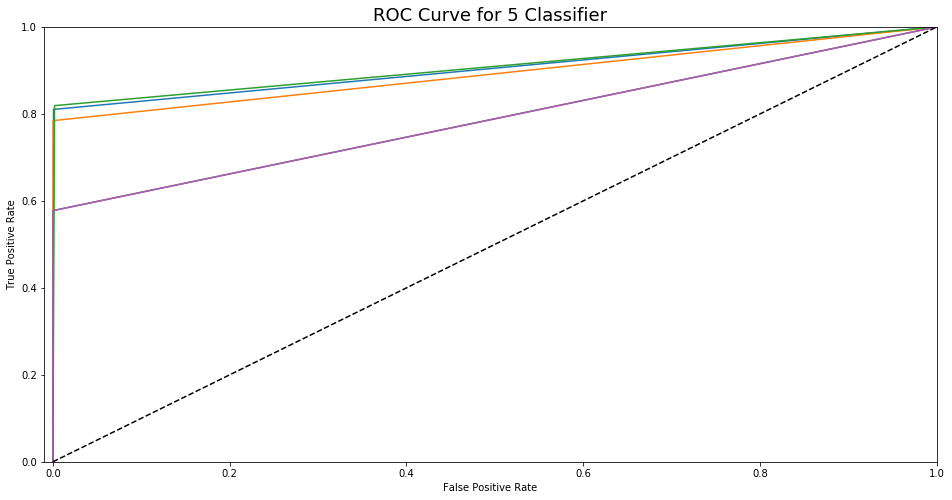

In [88]:
from sklearn.metrics import roc_curve

LR_fpr, LR_tpr, LR_thresold = roc_curve(y_test, y_pred_list[0])
KNN_fpr, KNN_tpr, KNN_threshold = roc_curve(y_test, y_pred_list[1])
DTC_fpr, DTC_tpr, DTC_threshold = roc_curve(y_test, y_pred_list[2])
SVM_fpr, SVM_tpr, SVM_threshold = roc_curve(y_test, y_pred_list[3])  
RFC_fpr, RFC_tpr, RFC_threshold = roc_curve(y_test, y_pred_list[3])  

plt.figure(figsize=(16,8))
plt.title('ROC Curve for 5 Classifier', fontsize = 18)
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression ')
plt.plot(KNN_fpr, KNN_tpr, label='KNears Neighbors ')
plt.plot(DTC_fpr, DTC_tpr, label='Decision Tree ')
plt.plot(SVM_fpr, SVM_tpr, label='Support Vector ')
plt.plot(RFC_fpr, RFC_tpr, label='Random Forrest ')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')